# 1. Apricot dataset RGC positions

Let's first load ON midget RGC data from "apricot_data" data set (Chichilnisky lab?)

In [2]:
%matplotlib inline
import numpy as np
import scipy.io as spio

OnMidget_data = spio.loadmat('mosaicGLM_apricot_ONMidget-1-mat.mat')
N_OnMidget = len(OnMidget_data['mosaicGLM'][0])
print 'Total %d cells' % N_OnMidget
OnMidget_data = OnMidget_data['mosaicGLM'][0]

Total 236 cells


Matlab data is loaded as ugly nested arrays:

In [3]:
cellnum = 3
OnMidget_data[cellnum][0][0][3]

array([[(array([[31.64142021]]), array([[10.27259694]]), array([[0.39106002]]), array([[1.08268023]]), array([[-0.39071435]]))]],
      dtype=[('center_point_x', 'O'), ('center_point_y', 'O'), ('center_sd_x', 'O'), ('center_sd_y', 'O'), ('center_rotation_angle', 'O')])

So let's extract it to an intelligible format (pandas DataFrame)

In [4]:
cell_rf_list = []  # rf = receptive field
for cellnum in range(N_OnMidget):
    cellpar = {'center_x':   OnMidget_data[cellnum][0][0][3][0][0][0][0][0], 
               'center_y':   OnMidget_data[cellnum][0][0][3][0][0][1][0][0], 
               'sd_x':       OnMidget_data[cellnum][0][0][3][0][0][2][0][0],
               'sd_y':       OnMidget_data[cellnum][0][0][3][0][0][3][0][0], 
               'center_rot': OnMidget_data[cellnum][0][0][3][0][0][4][0][0]}
    cell_rf_list.append(cellpar)

import pandas as pd
    
cell_rfs = pd.DataFrame(cell_rf_list)
cell_rfs.describe()

,center_rot,center_x,center_y,sd_x,sd_y
count,236.000000,236.000000,236.000000,236.000000,236.000000
mean,-3.105029,41.029742,19.785444,0.607434,0.793351
std,2.400862,13.368939,7.367852,0.223762,0.262347
min,-6.280049,15.695811,6.218928,0.197424,0.226827
25%,-5.751649,30.114515,13.538267,0.451508,0.608460
50%,-3.128492,39.822661,19.638076,0.580013,0.790252
75%,-0.501862,51.816837,26.275158,0.712642,0.942241
max,-0.009379,66.104261,39.546956,1.537658,1.531787


Now, we can plot the data

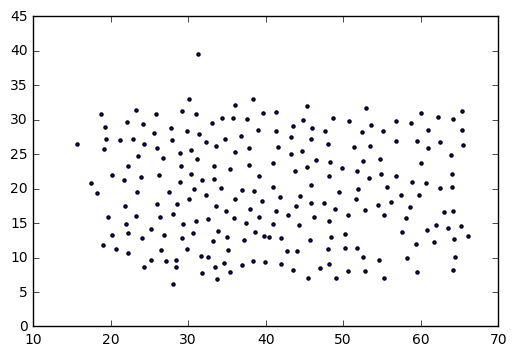

In [5]:
import matplotlib.pyplot as plt

plt.scatter(cell_rfs.center_x, cell_rfs.center_y, marker='.')

We are still missing the 1 SD Gaussian fits

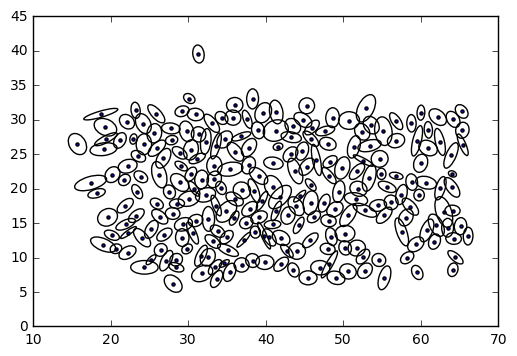

In [10]:
from matplotlib.patches import Ellipse

plt.figure()
ax = plt.gca()
for cellnum in range(N_OnMidget):
    currcell = cell_rfs.iloc[cellnum]
    # width, height = diameter of horizontal/vertical semi-axis; rotation, ccw in degrees
    rf_ellipse = Ellipse(xy=(currcell.center_x, currcell.center_y),
                         width=currcell.sd_x*2*1.5, 
                         height=currcell.sd_y*2*1.5,
                         angle=np.rad2deg(currcell.center_rot))
    
    rf_ellipse.set_facecolor('none')
    ax.add_artist(rf_ellipse)
    
plt.scatter(cell_rfs.center_x, cell_rfs.center_y, marker='.')

Let's plot them all

Data set mosaicGLM_apricot_ONMidget-1-mat.mat has 236 cells
Data set mosaicGLM_apricot_OFFMidget-1-mat.mat has 282 cells
Data set mosaicGLM_apricot_ONParasol-1-mat.mat has 94 cells
Data set mosaicGLM_apricot_OFFParasol-1-mat.mat has 79 cells


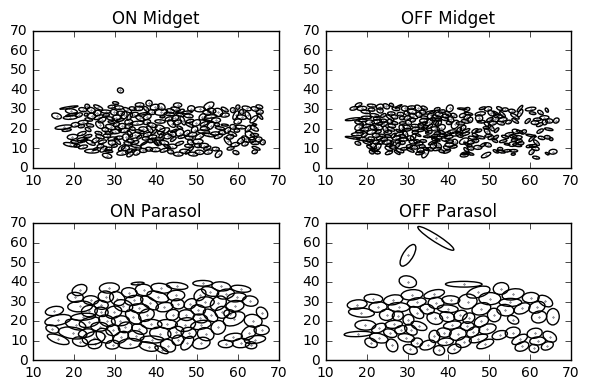

In [9]:
def extract_rfs(datafile_loc):
    data = spio.loadmat(datafile_loc)
    N_cells = len(data['mosaicGLM'][0])
    data = data['mosaicGLM'][0]
    
    print 'Data set %s has %d cells' % (datafile_loc, N_cells)
    
    cell_rf_list = []  # rf = receptive field
    for cellnum in range(N_cells):
        cellpar = {'center_x':   data[cellnum][0][0][3][0][0][0][0][0], 
                   'center_y':   data[cellnum][0][0][3][0][0][1][0][0], 
                   'sd_x':       data[cellnum][0][0][3][0][0][2][0][0],
                   'sd_y':       data[cellnum][0][0][3][0][0][3][0][0], 
                   'center_rot': data[cellnum][0][0][3][0][0][4][0][0]}
        cell_rf_list.append(cellpar)

    cell_rfs = pd.DataFrame(cell_rf_list)
    return cell_rfs
    
def plot_gaussianfits(cell_rfs, ax, n_sd=1.5, marker_size=0.1, marker_color='blue'):  # You can provide n_sd=2,3,... if you want bigger ellipses or 0=none
    N_cells = len(cell_rfs.index)

    if n_sd > 0:
        for cellnum in range(N_cells):
            currcell = cell_rfs.iloc[cellnum]

            rf_ellipse = Ellipse(xy=(currcell.center_x, currcell.center_y),
                                 width=currcell.sd_x*2*n_sd, 
                                 height=currcell.sd_y*2*n_sd,
                                 angle=np.rad2deg(currcell.center_rot))

            rf_ellipse.set_facecolor('none')
            ax.add_artist(rf_ellipse)
    
    ax.scatter(cell_rfs.center_x, cell_rfs.center_y, s=marker_size, c=marker_color)
    
plt.subplots(2,2)

### Midgets
plt.subplot(221)
plt.title('ON Midget')
ax1 = plt.gca()
plot_gaussianfits(extract_rfs('mosaicGLM_apricot_ONMidget-1-mat.mat'), ax1)

plt.subplot(222, sharex=ax1, sharey=ax1)
plt.title('OFF Midget')
ax = plt.gca()
plot_gaussianfits(extract_rfs('mosaicGLM_apricot_OFFMidget-1-mat.mat'), ax)

## Parasols
plt.subplot(223, sharex=ax1, sharey=ax1)
plt.title('ON Parasol')
ax = plt.gca()
plot_gaussianfits(extract_rfs('mosaicGLM_apricot_ONParasol-1-mat.mat'), ax)

plt.subplot(224, sharex=ax1, sharey=ax1)
plt.title('OFF Parasol')
ax = plt.gca()
plot_gaussianfits(extract_rfs('mosaicGLM_apricot_OFFParasol-1-mat.mat'), ax)

plt.tight_layout()

Then, let's viz_module how the ON/OFF mosaic centers are laid out

Data set mosaicGLM_apricot_ONMidget-1-mat.mat has 236 cells
Data set mosaicGLM_apricot_OFFMidget-1-mat.mat has 282 cells
Data set mosaicGLM_apricot_ONParasol-1-mat.mat has 94 cells
Data set mosaicGLM_apricot_OFFParasol-1-mat.mat has 79 cells


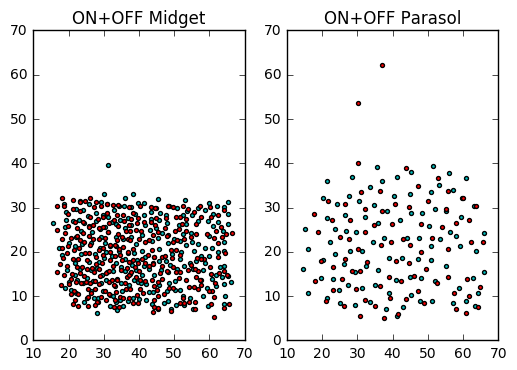

In [8]:
plt.subplots(1,2)
plt.subplot(121)
plt.title('ON+OFF Midget')
ax1 = plt.gca()
plot_gaussianfits(extract_rfs('mosaicGLM_apricot_ONMidget-1-mat.mat'), ax1, n_sd=0, marker_size=8, marker_color='c')
plot_gaussianfits(extract_rfs('mosaicGLM_apricot_OFFMidget-1-mat.mat'), ax1, n_sd=0, marker_size=8, marker_color='r')

plt.subplot(122, sharey=ax1, sharex=ax1)
plt.title('ON+OFF Parasol')
ax = plt.gca()
plot_gaussianfits(extract_rfs('mosaicGLM_apricot_ONParasol-1-mat.mat'), ax, n_sd=0, marker_size=8, marker_color='c')
plot_gaussianfits(extract_rfs('mosaicGLM_apricot_OFFParasol-1-mat.mat'), ax, n_sd=0, marker_size=8, marker_color='r')